In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from pathlib import Path
import torch
import torch.nn as nn
import re
from utils_notebook import histogram_experiment, dataframe_to_latex

In [2]:
results_path = "../results/all_db_all_training"


In [3]:
full_results_df = pd.DataFrame()
# For all folder in results_path
for experiment_folder in os.listdir(results_path):
    # Load the data
    # if experiment starts with DDPM skip
    # if not "DDPM" in experiment_folder:
    #     continue
    for dataset_folder in os.listdir(os.path.join(results_path, experiment_folder)):
        if "A_synthetic" not in dataset_folder:
            continue
        try:
            dataset_results = pd.read_csv(Path(results_path, experiment_folder,dataset_folder, "model_metrics.csv"))
        except:
            print(f"Error loading {results_path}/{experiment_folder}/{dataset_folder}/model_metrics.csv")
            continue
        dataset_results["experiment"] = experiment_folder
        dataset_results["dataset_name"] = "_".join(dataset_folder.split("_")[:-2])
        dataset_results['dataset_version'] = dataset_folder.split("_")[-1]
        # dataset_results['nb_bins'] = int(re.search(r"bins(\d+)", experiment_folder).group(1))
        # dataset_results['T'] = int(re.search(r"T(\d+)", experiment_folder).group(1))
        dataset_results['dimension'] = dataset_results['dataset_name'].str.extract(r"f(\d+)", expand=False).astype(int)
        full_results_df = pd.concat([full_results_df, dataset_results])
# result_path = "../results/grid_search_new_db"
# for experiment_folder in os.listdir("../results/grid_search_new_db"):
#     # Load the data
#     # if experiment starts with DDPM skip
#     for dataset_folder in os.listdir(os.path.join("../results/grid_search_new_db", experiment_folder)):
#         if "A_synthetic" not in dataset_folder:
#             continue
#         try:
#             dataset_results = pd.read_csv(Path("../results/grid_search_new_db", experiment_folder,dataset_folder, "model_metrics.csv"))
#         except:
#             print(f"Error loading {results_path}/{experiment_folder}/{dataset_folder}/model_metrics.csv")
#             continue
#         dataset_results["experiment"] = experiment_folder
#         dataset_results["dataset_name"] = "_".join(dataset_folder.split("_")[:-2])
#         dataset_results['dataset_version'] = dataset_folder.split("_")[-1]
#         # dataset_results['nb_bins'] = int(re.search(r"bins(\d+)", experiment_folder).group(1))
#         # dataset_results['T'] = int(re.search(r"T(\d+)", experiment_folder).group(1))
#         dataset_results['dimension'] = dataset_results['dataset_name'].str.extract(r"f(\d+)", expand=False).astype(int)
#         full_results_df = pd.concat([full_results_df, dataset_results])


In [4]:
full_results_df.columns

Index(['Unnamed: 0', 'training_time', 'inference_time', 'f1_score',
       'model_name', 'dataset_name', 'training_method', 'sampling_method',
       'random_seed', 'aucroc', 'experiment', 'dataset_version', 'dimension',
       'reconstruction_error_accuracy', 'reconstruction_error_ndcg',
       'reconstruction_error_time', 'shap_explanation_accuracy',
       'shap_feature_importance_ndcg', 'shap_explanation_time'],
      dtype='object')

In [5]:
def extract_ddpm_shap(row, column_name):
    if "DDPM" in row["experiment"]:
        return row[column_name]
    else:
        return np.nan
    
full_results_df['ddpm_shap_accuracy'] = full_results_df.apply(lambda row: extract_ddpm_shap(row, "shap_explanation_accuracy"), axis=1)
full_results_df['ddpm_shap_ndcg'] = full_results_df.apply(lambda row: extract_ddpm_shap(row, "shap_feature_importance_ndcg"), axis=1)
full_results_df['ddpm_shap_time'] = full_results_df.apply(lambda row: extract_ddpm_shap(row, "shap_explanation_time"), axis=1)

In [6]:
full_results_df = full_results_df.drop(columns=["Unnamed: 0", "model_name", "sampling_method"], )
full_results_df.head(5)

,training_time,inference_time,f1_score,dataset_name,training_method,random_seed,aucroc,experiment,dataset_version,dimension,reconstruction_error_accuracy,reconstruction_error_ndcg,reconstruction_error_time,shap_explanation_accuracy,shap_feature_importance_ndcg,shap_explanation_time,ddpm_shap_accuracy,ddpm_shap_ndcg,ddpm_shap_time
0,1662.961723,0.215374,0.524000,A_synthetic_f4_s5000_c2_r0.05_0.05,DSIL,0,0.763793,DTEC_DSIL_exponential_0.5_s0_T400_bins7,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1689.950691,0.245001,0.890000,A_synthetic_f50_s5000_c12_r0.02_0.02_0.02_0.02...,DSIL,0,0.989764,DTEC_DSIL_exponential_0.5_s0_T400_bins7,5,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1667.265704,0.195111,0.658586,A_synthetic_f10_s5000_c4_r0.033_0.033_0.033,DSIL,0,0.890196,DTEC_DSIL_exponential_0.5_s0_T400_bins7,2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1425.974077,0.149102,0.858000,A_synthetic_f1000_s5000_c40_r0.02_0.02_0.02_0....,DSIL,0,0.935408,DTEC_DSIL_exponential_0.5_s0_T400_bins7,3,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1448.701841,0.158181,0.856000,A_synthetic_f1000_s5000_c40_r0.02_0.02_0.02_0....,DSIL,0,0.934186,DTEC_DSIL_exponential_0.5_s0_T400_bins7,4,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
full_results_df["dataset_name"].unique()

array(['A_synthetic_f4_s5000_c2_r0.05_0.05',
       'A_synthetic_f50_s5000_c12_r0.02_0.02_0.02_0.02_0.02',
       'A_synthetic_f10_s5000_c4_r0.033_0.033_0.033',
       'A_synthetic_f1000_s5000_c40_r0.02_0.02_0.02_0.02_0.02',
       'A_synthetic_f1000_s5000_c40_r0.01_0.01_0.01_0.01_0.01',
       'A_synthetic_f10_s5000_c4_r0.0166_0.0166_0.0166',
       'A_synthetic_f100_s5000_c40_r0.02_0.02_0.02_0.02_0.02',
       'A_synthetic_f4_s5000_c2_r0.025_0.025',
       'A_synthetic_f50_s5000_c12_r0.01_0.01_0.01_0.01_0.01',
       'A_synthetic_f1000_s5000_c12_r0.01_0.01_0.01_0.01_0.01',
       'A_synthetic_f100_s5000_c40_r0.01_0.01_0.01_0.01_0.01'],
      dtype=object)

In [8]:
for name in full_results_df.columns:
    print(name)

training_time
inference_time
f1_score
dataset_name
training_method
random_seed
aucroc
experiment
dataset_version
dimension
reconstruction_error_accuracy
reconstruction_error_ndcg
reconstruction_error_time
shap_explanation_accuracy
shap_feature_importance_ndcg
shap_explanation_time
ddpm_shap_accuracy
ddpm_shap_ndcg
ddpm_shap_time


In [9]:

# Function to extract the sum of ratios
def extract_sum_of_ratios(dataset_name):
    # Use regex to extract all ratios after 'r' and before '_', split by '_'
    ratios = re.findall(r'r([\d\.]+(?:_[\d\.]+)*)', dataset_name)
    if ratios:
        # Convert the extracted ratios to a list of floats
        ratio_list = list(map(float, ratios[0].split('_')))
        return sum(ratio_list) * 100
    return 0  # Default value if no ratios are found

# Apply the function to the dataframe
full_results_df['anomaly_ratio'] = full_results_df['dataset_name'].apply(extract_sum_of_ratios)
# Recreate the dataset names with "Synthetic {dimension}d, {ratio*100}% anomalies"
full_results_df['dataset_name'] = full_results_df['dimension'].apply(lambda x: f"Synthetic {x}d") + ", " + (full_results_df['anomaly_ratio']).astype(int).astype(str) + "\\% anomalies"
# Add ratio to dataset name


In [10]:
full_results_df['anomaly_ratio'].unique()

array([10.  ,  9.9 ,  5.  ,  4.98])

In [11]:
# Keep only row where nb_bins = 7 and T = 400
# full_results_df = full_results_df[(full_results_df['nb_bins'] == 7) & (full_results_df['T'] == 400)]
# full_results_df = full_results_df.drop(columns=["nb_bins", "T"])

In [12]:
full_results_df

,training_time,inference_time,f1_score,dataset_name,training_method,random_seed,aucroc,experiment,dataset_version,dimension,reconstruction_error_accuracy,reconstruction_error_ndcg,reconstruction_error_time,shap_explanation_accuracy,shap_feature_importance_ndcg,shap_explanation_time,ddpm_shap_accuracy,ddpm_shap_ndcg,ddpm_shap_time,anomaly_ratio
0,1662.961723,0.215374,0.524000,"Synthetic 4d, 10\% anomalies",DSIL,0,0.763793,DTEC_DSIL_exponential_0.5_s0_T400_bins7,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
0,1689.950691,0.245001,0.890000,"Synthetic 50d, 10\% anomalies",DSIL,0,0.989764,DTEC_DSIL_exponential_0.5_s0_T400_bins7,5,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
0,1667.265704,0.195111,0.658586,"Synthetic 10d, 9\% anomalies",DSIL,0,0.890196,DTEC_DSIL_exponential_0.5_s0_T400_bins7,2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.9
0,1425.974077,0.149102,0.858000,"Synthetic 1000d, 10\% anomalies",DSIL,0,0.935408,DTEC_DSIL_exponential_0.5_s0_T400_bins7,3,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
0,1448.701841,0.158181,0.856000,"Synthetic 1000d, 10\% anomalies",DSIL,0,0.934186,DTEC_DSIL_exponential_0.5_s0_T400_bins7,4,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,544.678821,0.159945,0.692000,"Synthetic 100d, 10\% anomalies",unsupervised,0,0.911093,DTEC_unsupervised_None_s0_T400_bins7,3,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
0,544.441437,0.236694,0.700000,"Synthetic 4d, 5\% anomalies",unsupervised,0,0.917133,DTEC_unsupervised_None_s0_T400_bins7,5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
0,548.989511,0.209866,0.568000,"Synthetic 50d, 5\% anomalies",unsupervised,0,0.861925,DTEC_unsupervised_None_s0_T400_bins7,3,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
0,530.900105,0.220133,0.715152,"Synthetic 10d, 9\% anomalies",unsupervised,0,0.906662,DTEC_unsupervised_None_s0_T400_bins7,1,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.9


In [13]:
# Compute mean and std for each dataset with different version, but same experiment name
temp_df = full_results_df.drop(columns=['training_method', "dataset_version"])
mean_df = temp_df.groupby(["experiment", "dataset_name", "anomaly_ratio", "dimension"]).mean().reset_index()
std_df = temp_df.groupby(["experiment", "dataset_name", "anomaly_ratio", "dimension"]).std().reset_index()

In [14]:
print(full_results_df['experiment'].unique())
print(full_results_df['dataset_name'].unique())

['DTEC_DSIL_exponential_0.5_s0_T400_bins7'
 'DTEC_DSIL_cosine_0.5_s0_T400_bins7' 'DDPM_unsupervised_None_s0'
 'DDPM_DSIL_deterministic_cosine_s0' 'DDPM_DSIL_deterministic_0.5_s0'
 'DDPM_DSIL_deterministic_exponential_s0'
 'DTEC_DSIL_deterministic_0.5_s0_T400_bins7'
 'DTEC_unsupervised_None_s0_T400_bins7']
['Synthetic 4d, 10\\% anomalies' 'Synthetic 50d, 10\\% anomalies'
 'Synthetic 10d, 9\\% anomalies' 'Synthetic 1000d, 10\\% anomalies'
 'Synthetic 1000d, 5\\% anomalies' 'Synthetic 10d, 4\\% anomalies'
 'Synthetic 100d, 10\\% anomalies' 'Synthetic 4d, 5\\% anomalies'
 'Synthetic 50d, 5\\% anomalies' 'Synthetic 100d, 5\\% anomalies']


In [15]:
# Extract model name from experiment name, its the part before the first _
mean_df['model_name'] = mean_df['experiment'].str.extract(r"([A-Za-z0-9]+)_")
std_df['model_name'] = std_df['experiment'].str.extract(r"([A-Za-z0-9]+)_")


In [16]:
mean_df.head(20)

,experiment,dataset_name,anomaly_ratio,dimension,training_time,inference_time,f1_score,random_seed,aucroc,reconstruction_error_accuracy,reconstruction_error_ndcg,reconstruction_error_time,shap_explanation_accuracy,shap_feature_importance_ndcg,shap_explanation_time,ddpm_shap_accuracy,ddpm_shap_ndcg,ddpm_shap_time,model_name
0,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 1000d, 10\% anomalies",10.00,1000,765.945943,2.098548,0.838000,0.0,0.945524,0.965915,0.508846,0.238156,NaN,NaN,NaN,NaN,NaN,NaN,DDPM
1,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 1000d, 5\% anomalies",5.00,1000,784.437319,2.091066,0.799600,0.0,0.921268,0.967178,0.484784,0.238057,0.055688,0.574981,42723.817633,0.055688,0.574981,42723.817633,DDPM
2,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 100d, 10\% anomalies",10.00,100,643.488149,1.876331,0.643333,0.0,0.855342,0.751156,0.410783,0.886477,NaN,NaN,NaN,NaN,NaN,NaN,DDPM
3,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 100d, 5\% anomalies",5.00,100,639.650700,1.871050,0.626000,0.0,0.875481,0.758332,0.415597,0.899745,NaN,NaN,NaN,NaN,NaN,NaN,DDPM
4,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 10d, 4\% anomalies",4.98,10,537.929237,1.881738,0.397590,0.0,0.764476,0.637286,0.365479,0.855741,NaN,NaN,NaN,NaN,NaN,NaN,DDPM
5,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 10d, 9\% anomalies",9.90,10,528.358684,1.883316,0.572727,0.0,0.821287,0.726796,0.507342,0.883782,NaN,NaN,NaN,NaN,NaN,NaN,DDPM
6,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 4d, 10\% anomalies",10.00,4,489.514955,2.434826,0.527333,0.0,0.759219,0.946477,0.504000,0.889872,NaN,NaN,NaN,NaN,NaN,NaN,DDPM
7,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 4d, 5\% anomalies",5.00,4,514.594142,1.889634,0.540667,0.0,0.828617,0.898031,0.532000,0.850821,NaN,NaN,NaN,NaN,NaN,NaN,DDPM
8,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 50d, 10\% anomalies",10.00,50,617.305587,1.860993,0.704333,0.0,0.905373,0.794374,0.523789,0.841248,NaN,NaN,NaN,NaN,NaN,NaN,DDPM
9,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 50d, 5\% anomalies",5.00,50,629.016709,1.875111,0.461333,0.0,0.784186,0.698832,0.333864,0.863039,NaN,NaN,NaN,NaN,NaN,NaN,DDPM


In [17]:
# Take only rows where experiment contains "0.5"
ddpm_mean_df = mean_df[mean_df['model_name'] == "DDPM"]
ddpm_std_df = std_df[std_df['model_name'] == "DDPM"]
ddpm_std_df.head()


,experiment,dataset_name,anomaly_ratio,dimension,training_time,inference_time,f1_score,random_seed,aucroc,reconstruction_error_accuracy,reconstruction_error_ndcg,reconstruction_error_time,shap_explanation_accuracy,shap_feature_importance_ndcg,shap_explanation_time,ddpm_shap_accuracy,ddpm_shap_ndcg,ddpm_shap_time,model_name
0,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 1000d, 10\% anomalies",10.00,1000,25.157110,0.012647,0.008099,0.0,0.007209,0.000919,0.005983,0.000819,NaN,NaN,NaN,NaN,NaN,NaN,DDPM
1,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 1000d, 5\% anomalies",5.00,1000,24.295879,0.017630,0.004402,0.0,0.014588,0.003942,0.004760,0.005514,NaN,NaN,NaN,NaN,NaN,NaN,DDPM
2,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 100d, 10\% anomalies",10.00,100,1.378977,0.012830,0.011075,0.0,0.008105,0.006880,0.006584,0.085606,NaN,NaN,NaN,NaN,NaN,NaN,DDPM
3,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 100d, 5\% anomalies",5.00,100,7.351552,0.009725,0.019880,0.0,0.009416,0.005062,0.014713,0.011749,NaN,NaN,NaN,NaN,NaN,NaN,DDPM
4,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 10d, 4\% anomalies",4.98,10,29.552139,0.015132,0.020478,0.0,0.018715,0.009783,0.013135,0.047474,NaN,NaN,NaN,NaN,NaN,NaN,DDPM


In [18]:
def merge_and_create_latex_table(mean_df, std_df, column_name, caption="", label=""):
    # Step 1: Merge DataFrames on common columns
    merged_df = pd.merge(mean_df, std_df, on=["dataset_name", "experiment", "dimension", "anomaly_ratio"], suffixes=('_mean', '_std'))
    # Step 2: Combine mean and std into a single column with "mean(std)" format
    merged_df[f"{column_name}_str"] = merged_df.apply(
        lambda row: f"${row[f'{column_name}_mean']:.2f}({row[f'{column_name}_std']:.2f})$", axis=1
    )
    # Step 3: Drop the separate mean and std columns if needed
    merged_df = merged_df.drop(columns=[f"{column_name}_mean", f"{column_name}_std"])
    # Pivot so that each model is a experiment
    merged_df = merged_df.pivot(index=["dataset_name"], columns="experiment", values=f"{column_name}_str")
    merged_df = merged_df.reset_index()
    print(merged_df.columns)
    latex_table = dataframe_to_latex(
        merged_df,
        column_format="llc",  
        caption=caption,
        label=label,
        index=False
    )
    with open("latex_table.tex", "w") as f:
        f.write(latex_table)
    latex_table.replace("\n", " ")

In [19]:
merge_and_create_latex_table(ddpm_mean_df, ddpm_std_df, "aucroc", caption="AUCROC for DDPM", label="tab:ddpm_aucroc")

Index(['dataset_name', 'DDPM_DSIL_deterministic_0.5_s0',
       'DDPM_DSIL_deterministic_cosine_s0',
       'DDPM_DSIL_deterministic_exponential_s0', 'DDPM_unsupervised_None_s0'],
      dtype='object', name='experiment')


/home/elouan/code/code_repo/notebooks/utils_notebook.py:64: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace("_", " "))


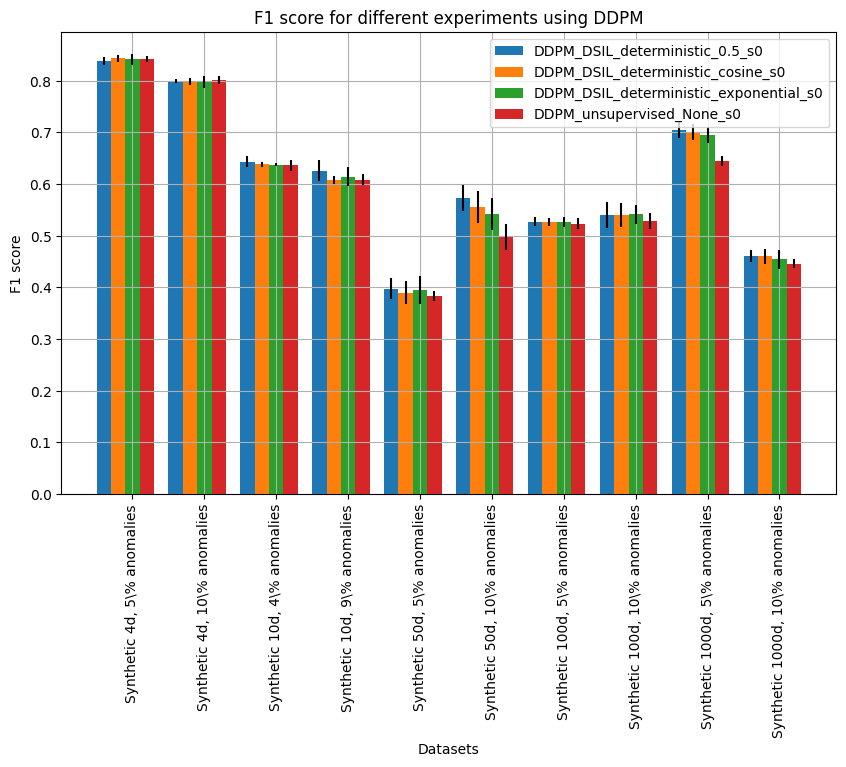

In [31]:
histogram_experiment(mean_df=ddpm_mean_df, std_df=ddpm_std_df, column="f1_score", ylabel="F1 score", title="F1 score for different experiments using DDPM")

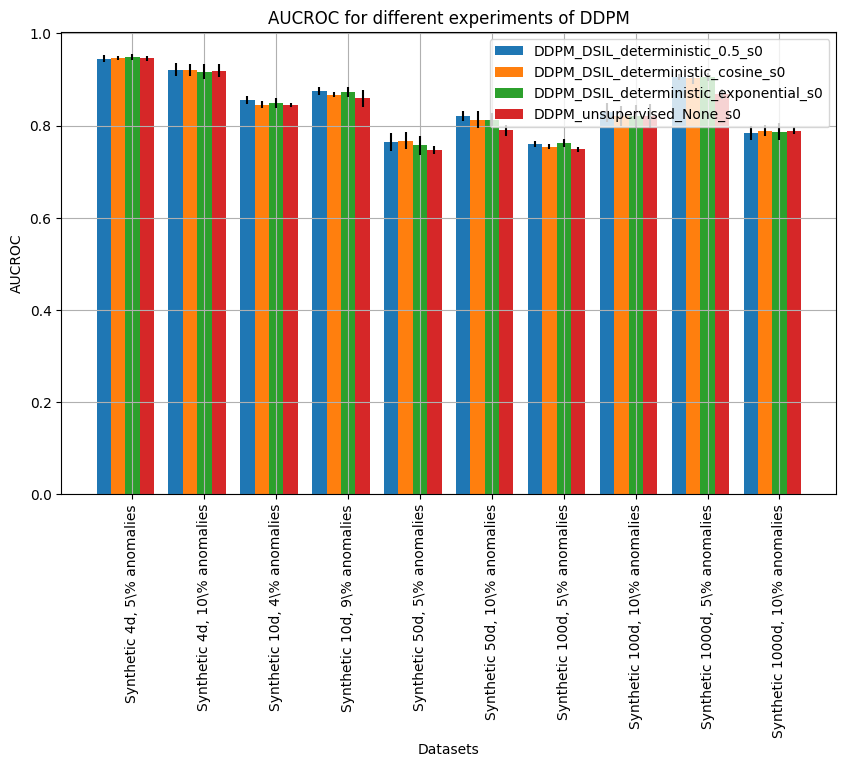

In [32]:
histogram_experiment(mean_df=ddpm_mean_df, std_df=ddpm_std_df, column="aucroc", ylabel="AUCROC", title="AUCROC for different experiments of DDPM")

In [22]:
mean_df

,experiment,dataset_name,anomaly_ratio,dimension,training_time,inference_time,f1_score,random_seed,aucroc,reconstruction_error_accuracy,reconstruction_error_ndcg,reconstruction_error_time,shap_explanation_accuracy,shap_feature_importance_ndcg,shap_explanation_time,ddpm_shap_accuracy,ddpm_shap_ndcg,ddpm_shap_time,model_name
0,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 1000d, 10\% anomalies",10.00,1000,765.945943,2.098548,0.838000,0.0,0.945524,0.965915,0.508846,0.238156,NaN,NaN,NaN,NaN,NaN,NaN,DDPM
1,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 1000d, 5\% anomalies",5.00,1000,784.437319,2.091066,0.799600,0.0,0.921268,0.967178,0.484784,0.238057,0.055688,0.574981,42723.817633,0.055688,0.574981,42723.817633,DDPM
2,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 100d, 10\% anomalies",10.00,100,643.488149,1.876331,0.643333,0.0,0.855342,0.751156,0.410783,0.886477,NaN,NaN,NaN,NaN,NaN,NaN,DDPM
3,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 100d, 5\% anomalies",5.00,100,639.650700,1.871050,0.626000,0.0,0.875481,0.758332,0.415597,0.899745,NaN,NaN,NaN,NaN,NaN,NaN,DDPM
4,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 10d, 4\% anomalies",4.98,10,537.929237,1.881738,0.397590,0.0,0.764476,0.637286,0.365479,0.855741,NaN,NaN,NaN,NaN,NaN,NaN,DDPM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,DTEC_unsupervised_None_s0_T400_bins7,"Synthetic 10d, 9\% anomalies",9.90,10,529.579052,0.207109,0.731313,0.0,0.903576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DTEC
76,DTEC_unsupervised_None_s0_T400_bins7,"Synthetic 4d, 10\% anomalies",10.00,4,544.946749,0.224528,0.563333,0.0,0.780559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DTEC
77,DTEC_unsupervised_None_s0_T400_bins7,"Synthetic 4d, 5\% anomalies",5.00,4,538.280450,0.221187,0.714000,0.0,0.926116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DTEC
78,DTEC_unsupervised_None_s0_T400_bins7,"Synthetic 50d, 10\% anomalies",10.00,50,549.127157,0.226363,0.858333,0.0,0.984983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DTEC


In [23]:
# Take only rows where experiment contains "0.5"
dte_mean_df = mean_df[mean_df['model_name'] == "DTEC"]
dte_std_df = std_df[std_df['model_name'] == "DTEC"]
dte_std_df.head()


,experiment,dataset_name,anomaly_ratio,dimension,training_time,inference_time,f1_score,random_seed,aucroc,reconstruction_error_accuracy,reconstruction_error_ndcg,reconstruction_error_time,shap_explanation_accuracy,shap_feature_importance_ndcg,shap_explanation_time,ddpm_shap_accuracy,ddpm_shap_ndcg,ddpm_shap_time,model_name
40,DTEC_DSIL_cosine_0.5_s0_T400_bins7,"Synthetic 1000d, 10\% anomalies",10.00,1000,49.698143,0.022913,0.013823,0.0,0.009936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DTEC
41,DTEC_DSIL_cosine_0.5_s0_T400_bins7,"Synthetic 1000d, 5\% anomalies",5.00,1000,22.831616,0.017464,0.027247,0.0,0.019470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DTEC
42,DTEC_DSIL_cosine_0.5_s0_T400_bins7,"Synthetic 100d, 10\% anomalies",10.00,100,11.151734,0.013513,0.015253,0.0,0.011058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DTEC
43,DTEC_DSIL_cosine_0.5_s0_T400_bins7,"Synthetic 100d, 5\% anomalies",5.00,100,17.809953,0.032304,0.014180,0.0,0.005224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DTEC
44,DTEC_DSIL_cosine_0.5_s0_T400_bins7,"Synthetic 10d, 4\% anomalies",4.98,10,17.574775,0.046053,0.032070,0.0,0.012424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DTEC


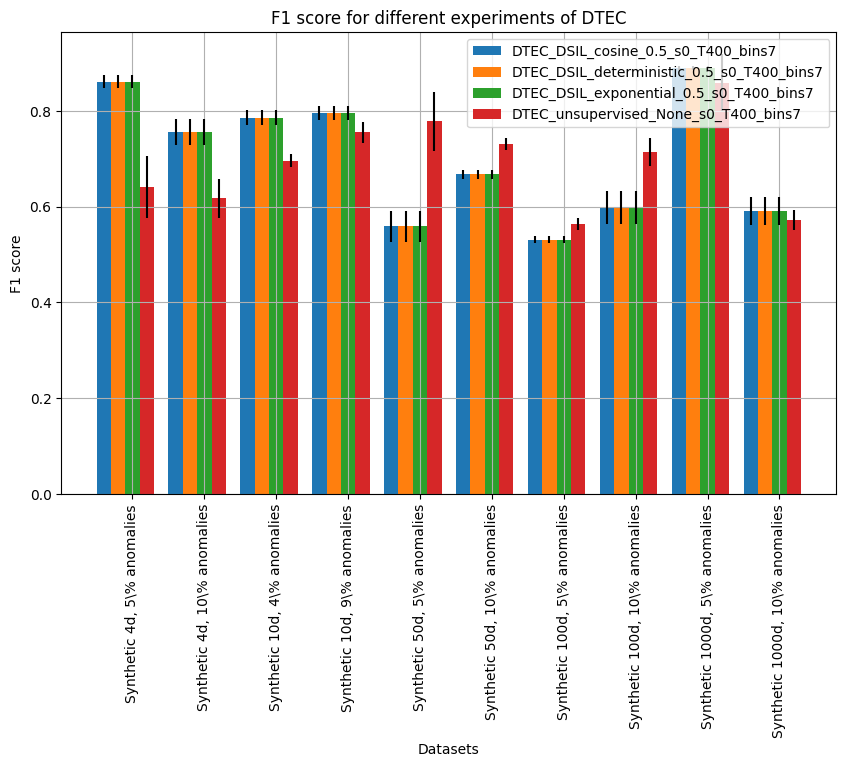

In [34]:
histogram_experiment(mean_df=dte_mean_df, std_df=dte_std_df, column="f1_score", ylabel="F1 score", title="F1 score for different experiments of DTEC")

In [25]:
merge_and_create_latex_table(dte_mean_df, dte_std_df, "f1_score", caption="F1 for DTEC", label="tab:dte_aucroc_synth")

Index(['dataset_name', 'DTEC_DSIL_cosine_0.5_s0_T400_bins7',
       'DTEC_DSIL_deterministic_0.5_s0_T400_bins7',
       'DTEC_DSIL_exponential_0.5_s0_T400_bins7',
       'DTEC_unsupervised_None_s0_T400_bins7'],
      dtype='object', name='experiment')


/home/elouan/code/code_repo/notebooks/utils_notebook.py:64: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace("_", " "))


In [26]:
# Function to extract the training method
def extract_training_method(experiment_name):
    # Regex to match the format {model_name}_{training_method}_s{seed}
    match = re.match(r'^[^_]+_([^_]+(?:_[^_]+)*)_s\d+', experiment_name)
    if match:
        return match.group(1)  # Extract the training_method part
    return None  # Return None if no match is found

# Apply the function to the dataframe
mean_df['training_method'] = mean_df['experiment'].apply(extract_training_method)
std_df['training_method'] = std_df['experiment'].apply(extract_training_method)
mean_df

,experiment,dataset_name,anomaly_ratio,dimension,training_time,inference_time,f1_score,random_seed,aucroc,reconstruction_error_accuracy,reconstruction_error_ndcg,reconstruction_error_time,shap_explanation_accuracy,shap_feature_importance_ndcg,shap_explanation_time,ddpm_shap_accuracy,ddpm_shap_ndcg,ddpm_shap_time,model_name,training_method
0,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 1000d, 10\% anomalies",10.00,1000,765.945943,2.098548,0.838000,0.0,0.945524,0.965915,0.508846,0.238156,NaN,NaN,NaN,NaN,NaN,NaN,DDPM,DSIL_deterministic_0.5
1,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 1000d, 5\% anomalies",5.00,1000,784.437319,2.091066,0.799600,0.0,0.921268,0.967178,0.484784,0.238057,0.055688,0.574981,42723.817633,0.055688,0.574981,42723.817633,DDPM,DSIL_deterministic_0.5
2,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 100d, 10\% anomalies",10.00,100,643.488149,1.876331,0.643333,0.0,0.855342,0.751156,0.410783,0.886477,NaN,NaN,NaN,NaN,NaN,NaN,DDPM,DSIL_deterministic_0.5
3,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 100d, 5\% anomalies",5.00,100,639.650700,1.871050,0.626000,0.0,0.875481,0.758332,0.415597,0.899745,NaN,NaN,NaN,NaN,NaN,NaN,DDPM,DSIL_deterministic_0.5
4,DDPM_DSIL_deterministic_0.5_s0,"Synthetic 10d, 4\% anomalies",4.98,10,537.929237,1.881738,0.397590,0.0,0.764476,0.637286,0.365479,0.855741,NaN,NaN,NaN,NaN,NaN,NaN,DDPM,DSIL_deterministic_0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,DTEC_unsupervised_None_s0_T400_bins7,"Synthetic 10d, 9\% anomalies",9.90,10,529.579052,0.207109,0.731313,0.0,0.903576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DTEC,unsupervised_None
76,DTEC_unsupervised_None_s0_T400_bins7,"Synthetic 4d, 10\% anomalies",10.00,4,544.946749,0.224528,0.563333,0.0,0.780559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DTEC,unsupervised_None
77,DTEC_unsupervised_None_s0_T400_bins7,"Synthetic 4d, 5\% anomalies",5.00,4,538.280450,0.221187,0.714000,0.0,0.926116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DTEC,unsupervised_None
78,DTEC_unsupervised_None_s0_T400_bins7,"Synthetic 50d, 10\% anomalies",10.00,50,549.127157,0.226363,0.858333,0.0,0.984983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DTEC,unsupervised_None


In [27]:

# Define a custom aggregation function to keep non-NaN values
def non_nan_agg(series):
    return series.dropna().iloc[0] if not series.dropna().empty else np.nan


In [28]:
explainability_mean_df = mean_df.drop(columns=["f1_score", "aucroc", "experiment", "model_name"])
explainability_std_df = std_df.drop(columns=["f1_score", "experiment", "model_name"])

grouped_mean_df = explainability_mean_df.groupby(["dataset_name", "training_method", "dimension", "anomaly_ratio"]).agg(non_nan_agg).reset_index()
grouped_std_df = explainability_std_df.groupby(["dataset_name", "training_method", "dimension", "anomaly_ratio"]).agg(non_nan_agg).reset_index()

grouped_mean_df.head(10)

,dataset_name,training_method,dimension,anomaly_ratio,training_time,inference_time,random_seed,reconstruction_error_accuracy,reconstruction_error_ndcg,reconstruction_error_time,shap_explanation_accuracy,shap_feature_importance_ndcg,shap_explanation_time,ddpm_shap_accuracy,ddpm_shap_ndcg,ddpm_shap_time
0,"Synthetic 1000d, 10\% anomalies",DSIL_cosine_0.5,1000,10.0,1491.896914,0.164041,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Synthetic 1000d, 10\% anomalies",DSIL_deterministic_0.5,1000,10.0,765.945943,2.098548,0.0,0.965915,0.508846,0.238156,NaN,NaN,NaN,NaN,NaN,NaN
2,"Synthetic 1000d, 10\% anomalies",DSIL_deterministic_cosine,1000,10.0,973.512816,3.995479,0.0,0.965624,0.504828,0.499621,NaN,NaN,NaN,NaN,NaN,NaN
3,"Synthetic 1000d, 10\% anomalies",DSIL_deterministic_exponential,1000,10.0,991.784993,3.757276,0.0,0.965436,0.504790,0.406884,NaN,NaN,NaN,NaN,NaN,NaN
4,"Synthetic 1000d, 10\% anomalies",DSIL_exponential_0.5,1000,10.0,1458.962283,0.148078,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Synthetic 1000d, 10\% anomalies",unsupervised_None,1000,10.0,420.301990,2.112860,0.0,0.967017,0.536768,0.238242,NaN,NaN,NaN,NaN,NaN,NaN
6,"Synthetic 1000d, 5\% anomalies",DSIL_cosine_0.5,1000,5.0,1564.562568,0.160229,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"Synthetic 1000d, 5\% anomalies",DSIL_deterministic_0.5,1000,5.0,784.437319,2.091066,0.0,0.967178,0.484784,0.238057,0.055688,0.574981,42723.817633,0.055688,0.574981,42723.817633
8,"Synthetic 1000d, 5\% anomalies",DSIL_deterministic_cosine,1000,5.0,982.734517,3.892107,0.0,0.967474,0.479264,0.551570,0.051667,0.563879,110718.444251,0.051667,0.563879,110718.444251
9,"Synthetic 1000d, 5\% anomalies",DSIL_deterministic_exponential,1000,5.0,1004.170651,3.769192,0.0,0.967166,0.480410,0.368106,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Sort by training method
grouped_mean_df = grouped_mean_df.sort_values(by="training_method")

grouped_mean_df.columns

Index(['dataset_name', 'training_method', 'dimension', 'anomaly_ratio',
       'training_time', 'inference_time', 'random_seed',
       'reconstruction_error_accuracy', 'reconstruction_error_ndcg',
       'reconstruction_error_time', 'shap_explanation_accuracy',
       'shap_feature_importance_ndcg', 'shap_explanation_time',
       'ddpm_shap_accuracy', 'ddpm_shap_ndcg', 'ddpm_shap_time'],
      dtype='object')

In [30]:
merge_and_create_latex_table(grouped_mean_df, grouped_std_df, ['shap_explanation_accuracy', 'reconstruction_error_accuracy'], caption="Explainability for DTEC", label="tab:dtec_explainability")

KeyError: 'experiment'

In [ ]:
def extract_ratios(dataset_name):
    # Use re.findall to capture all numerical ratios
    ratios = re.findall(r'r([0-9]*\.?[0-9]+)|_([0-9]*\.?[0-9]+)', dataset_name)
    # Flatten the list of tuples and filter out empty strings
    ratios = [float(r) for pair in ratios for r in pair if r]
    # Return the sum of the ratios
    return f"{sum(ratios) * 100:.2f}"
def rename_row(dataset_name):
    return "synthetic {} - {}".format(re.search(r"f(\d+)", dataset_name).group(1), extract_ratios(dataset_name))
# In dataset name, keep only the word "synthetic" and the number of feature which is after "f_"ArithmeticError
merged_df['dataset_name'] = merged_df['dataset_name'].apply(rename_row)


# Step 4: Pivot the DataFrame to have experiments as columns and datasets as rows
pivot_df = merged_df.pivot(index="dataset_name", columns="experiment", values="f1_score_str")

# If there is NaN in a column, remove the column
pivot_df = pivot_df.replace("nan", np.nan)
pivot_df = pivot_df.dropna(axis=1)
# Same if its nan in a string "nan"
# Step 5: Convert the pivoted DataFrame to LaTeX
latex_table = dataframe_to_latex(
    pivot_df,
    column_format="l" + "c" * (pivot_df.shape[1]),  # Adjust column format dynamically
    caption="F1 Score with Mean and Standard Deviation for Different Experiments and Datasets",
    label="tab:mean_std",
    index=True  # Include the row index (datasets)
)

# Save the LaTeX table to a file
with open("latex_table.tex", "w") as f:
    f.write(latex_table)

# Optional: Print the LaTeX table for verification
print(latex_table.replace("\n", " "))

NameError: name 'merged_df' is not defined

In [ ]:
full_results_df["ndcg_diff_shap_mean"] = full_results_df['shap_feature_importance_ndcg'] - full_results_df['mean_diffusion_ndcg']
full_results_df["ndcg_diff_shap_max"] = full_results_df['shap_feature_importance_ndcg'] - full_results_df['max_diffusion_ndcg']

full_results_df["ndcg_diff_grad_mean"] = full_results_df['grad_ndcg'] - full_results_df['mean_diffusion_ndcg']
full_results_df['accuracy_diff_shap_mean'] = full_results_df['shap_explanation_accuracy'] - full_results_df['mean_diffusion_accuracy']
full_results_df['accuracy_diff_shap_max'] = full_results_df['shap_explanation_accuracy'] - full_results_df['max_diffusion_accuracy']
full_results_df['accuracy_diff_grad_mean'] = full_results_df['grad_explanation_accuracy'] - full_results_df['mean_diffusion_accuracy']
full_results_df['ndcg_diff_shap_grad'] = full_results_df['shap_feature_importance_ndcg'] - full_results_df['grad_ndcg']
full_results_df['accuracy_diff_shap_grad'] = full_results_df['shap_explanation_accuracy'] - full_results_df['grad_explanation_accuracy']

full_results_df['ndcg_diff_mean_max']= full_results_df['mean_diffusion_ndcg'] - full_results_df['max_diffusion_ndcg']
full_results_df['accuracy_diff_mean_max']= full_results_df['mean_diffusion_accuracy'] - full_results_df['max_diffusion_accuracy']

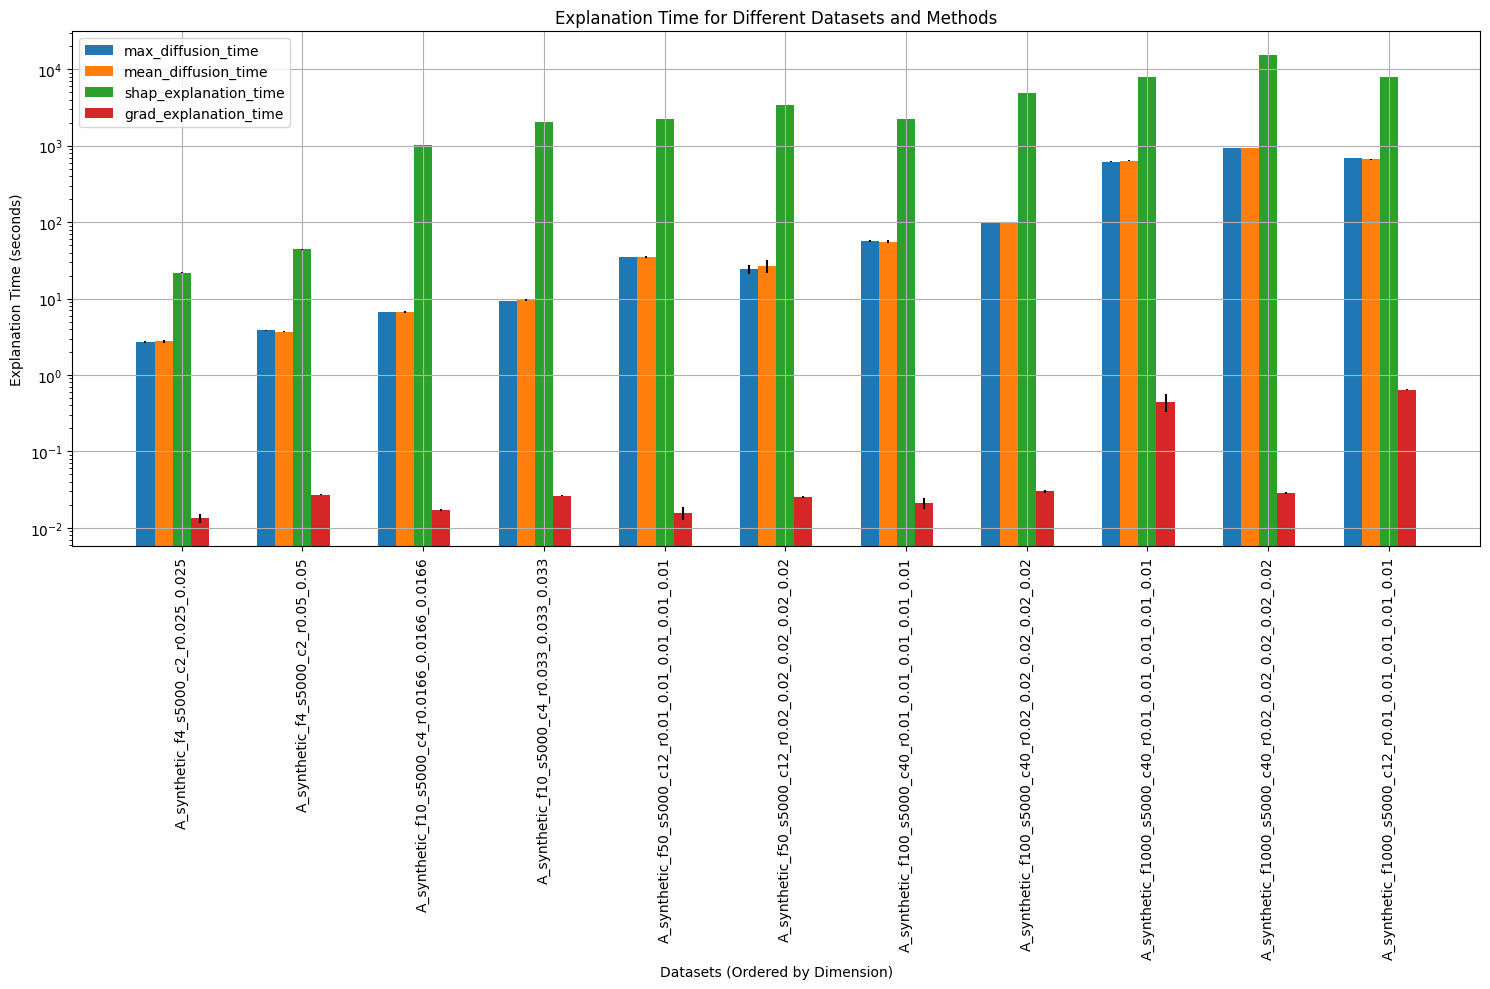

In [ ]:
# Sort datasets by dimension
mean_df = mean_df.sort_values('dimension')
std_df = std_df.sort_values('dimension')
datasets = mean_df['dataset_name'].unique()

# Extract unique methods
methods = ["max_diffusion_time", "mean_diffusion_time", "shap_explanation_time", "grad_explanation_time"]
num_datasets = len(datasets)
num_methods = len(methods)

r = np.arange(num_datasets)
bar_width = 0.15  # Adjust bar width to fit the methods

# Create the plot
fig, ax = plt.subplots(figsize=(15, 10))

# Plot each method's average explanation time as a bar
for i, method in enumerate(methods):
    method_mean = mean_df.groupby("dataset_name")[method].mean().reindex(datasets)
    method_std = std_df.groupby("dataset_name")[method].std().reindex(datasets)
    ax.bar(r + i * bar_width, method_mean.values, width=bar_width, yerr=method_std.values, label=method)

# Add labels, title, and customize the x-axis
ax.set_xlabel('Datasets (Ordered by Dimension)')
ax.set_ylabel('Explanation Time (seconds)')
ax.set_title('Explanation Time for Different Datasets and Methods')
ax.set_xticks(r + bar_width * (num_methods ) / 2)
ax.set_xticklabels(datasets)
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.yscale('log')
# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


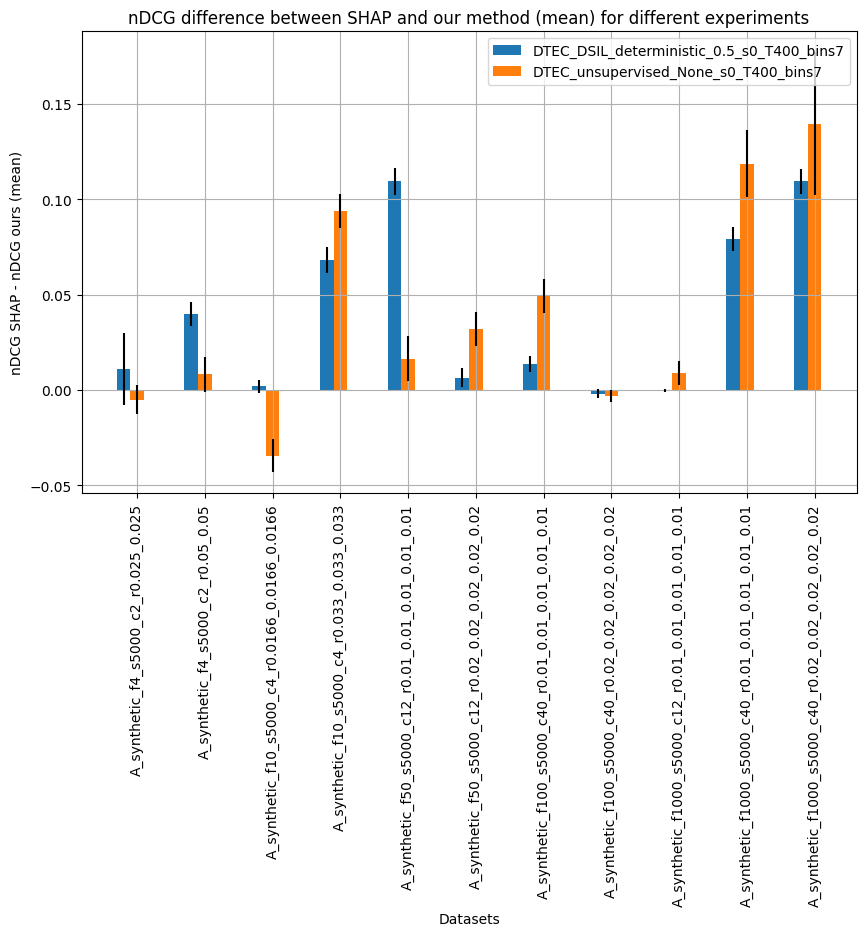

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="ndcg_diff_shap_mean", ylabel="nDCG SHAP - nDCG ours (mean)", title="nDCG difference between SHAP and our method (mean) for different experiments")

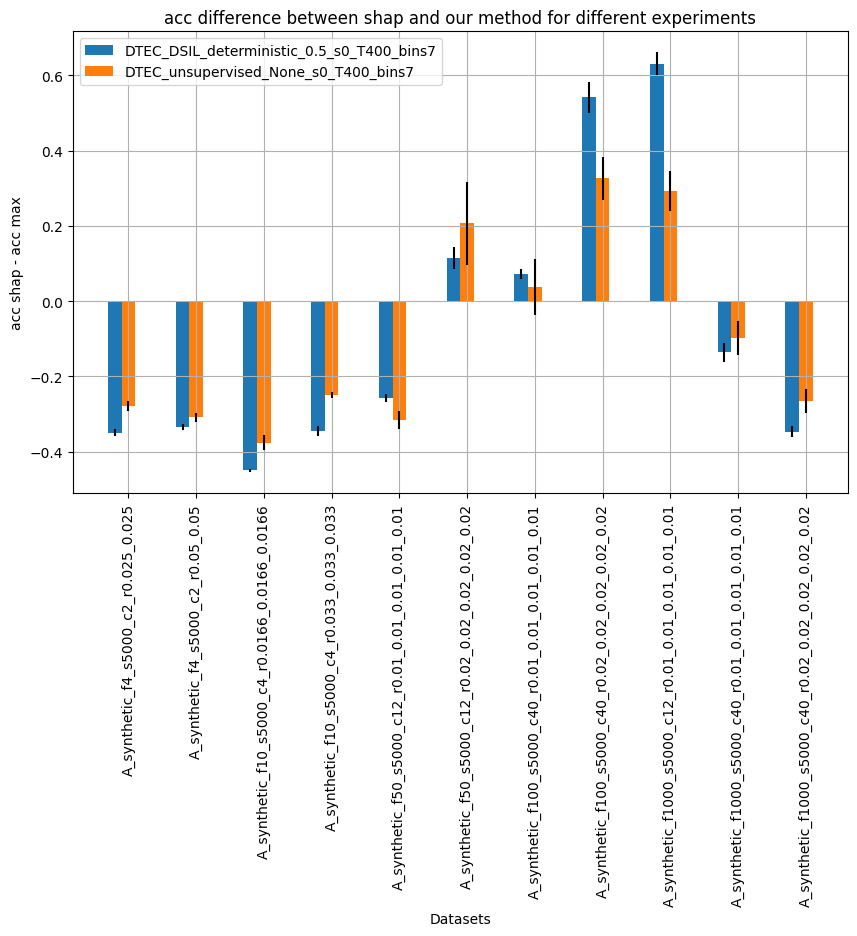

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="accuracy_diff_shap_max", ylabel="acc shap - acc max", title="acc difference between shap and our method for different experiments")

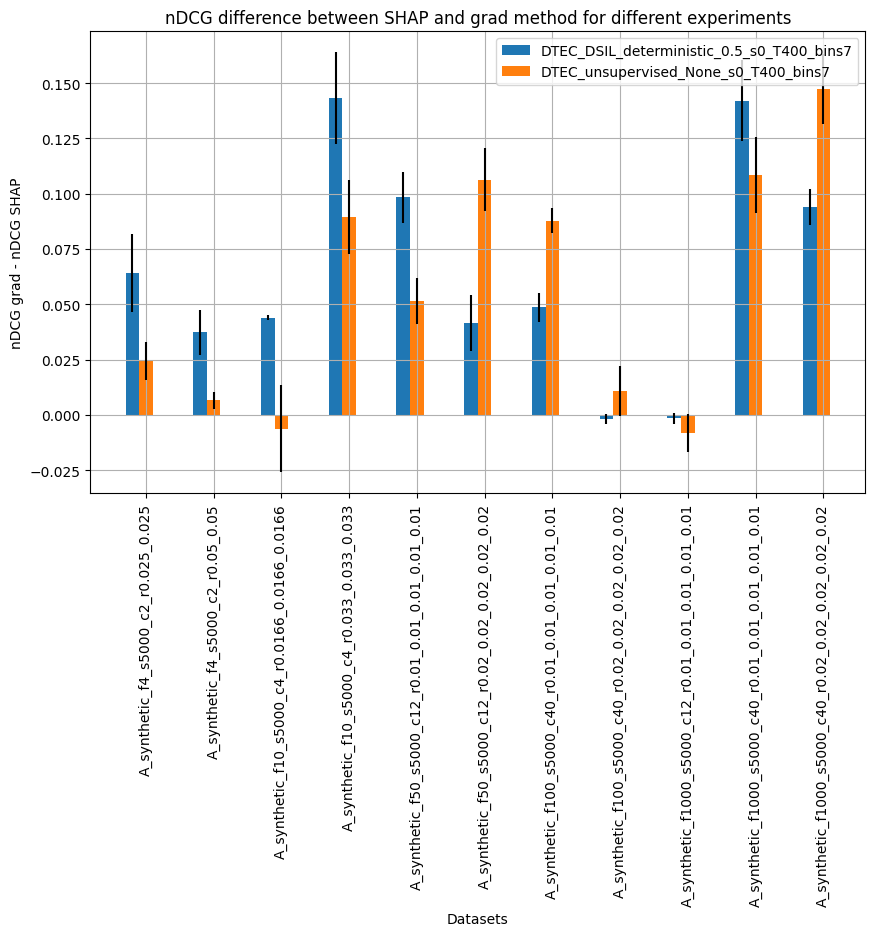

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="ndcg_diff_shap_grad", ylabel="nDCG grad - nDCG SHAP", title="nDCG difference between SHAP and grad method for different experiments")

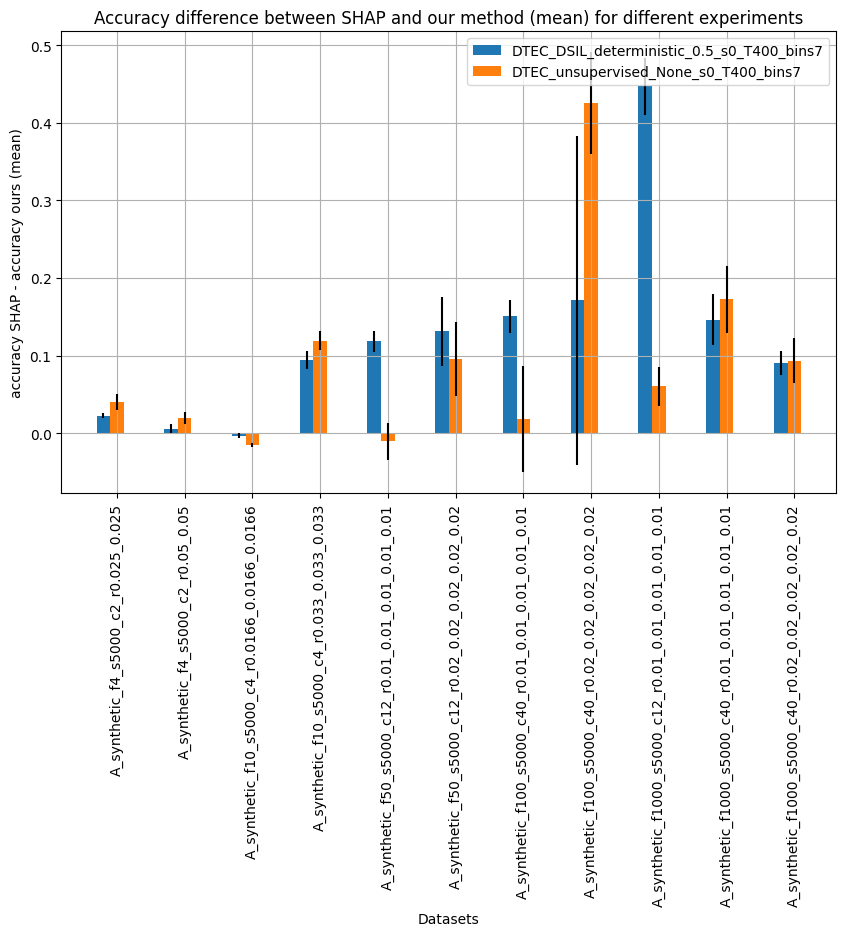

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="accuracy_diff_shap_mean", ylabel="accuracy SHAP - accuracy ours (mean)", title="Accuracy difference between SHAP and our method (mean) for different experiments")

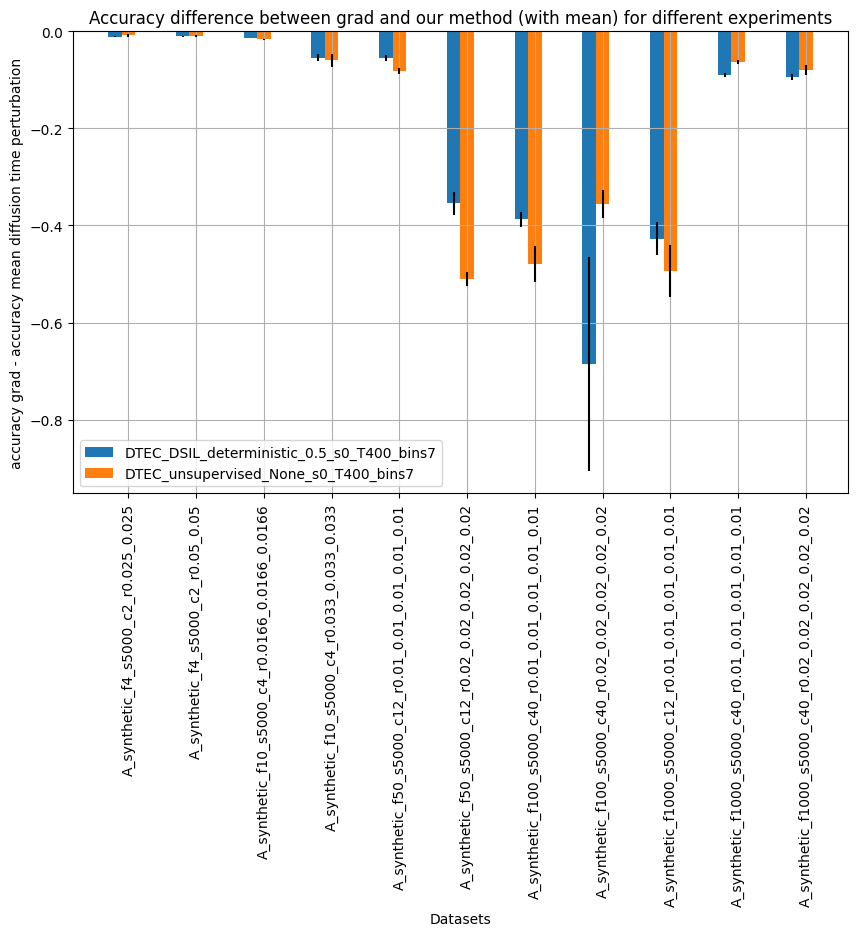

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="accuracy_diff_grad_mean", ylabel="accuracy grad - accuracy mean diffusion time perturbation", title="Accuracy difference between grad and our method (with mean) for different experiments")

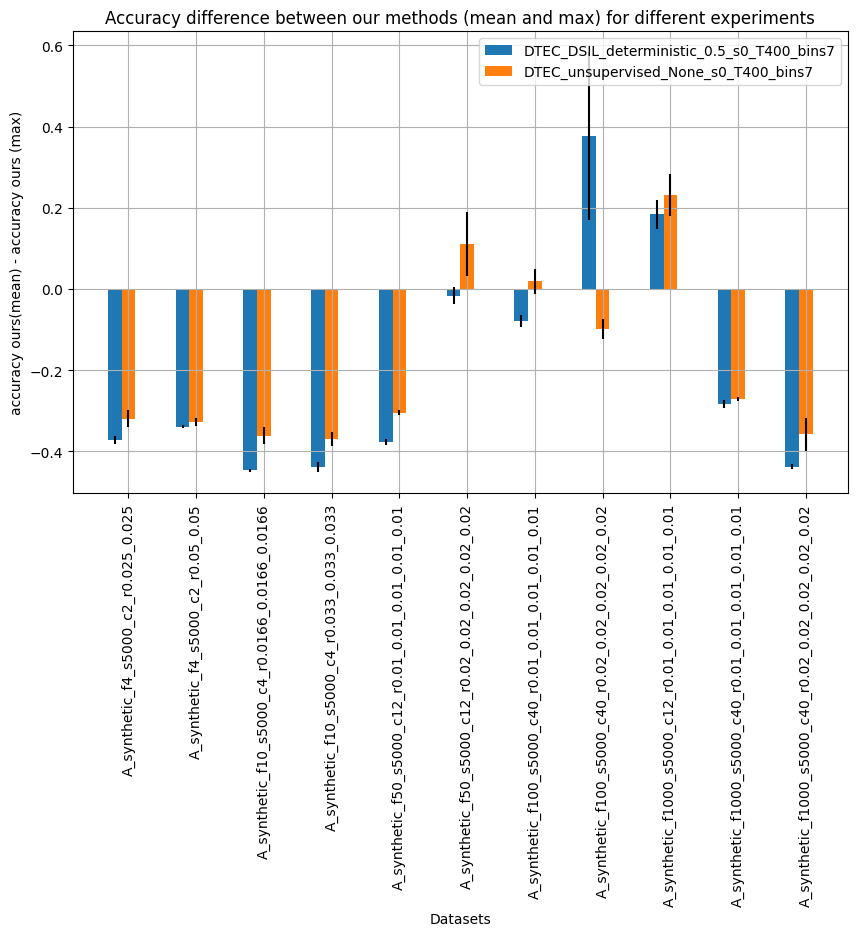

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="accuracy_diff_mean_max", ylabel="accuracy ours(mean) - accuracy ours (max)", title="Accuracy difference between our methods (mean and max) for different experiments")

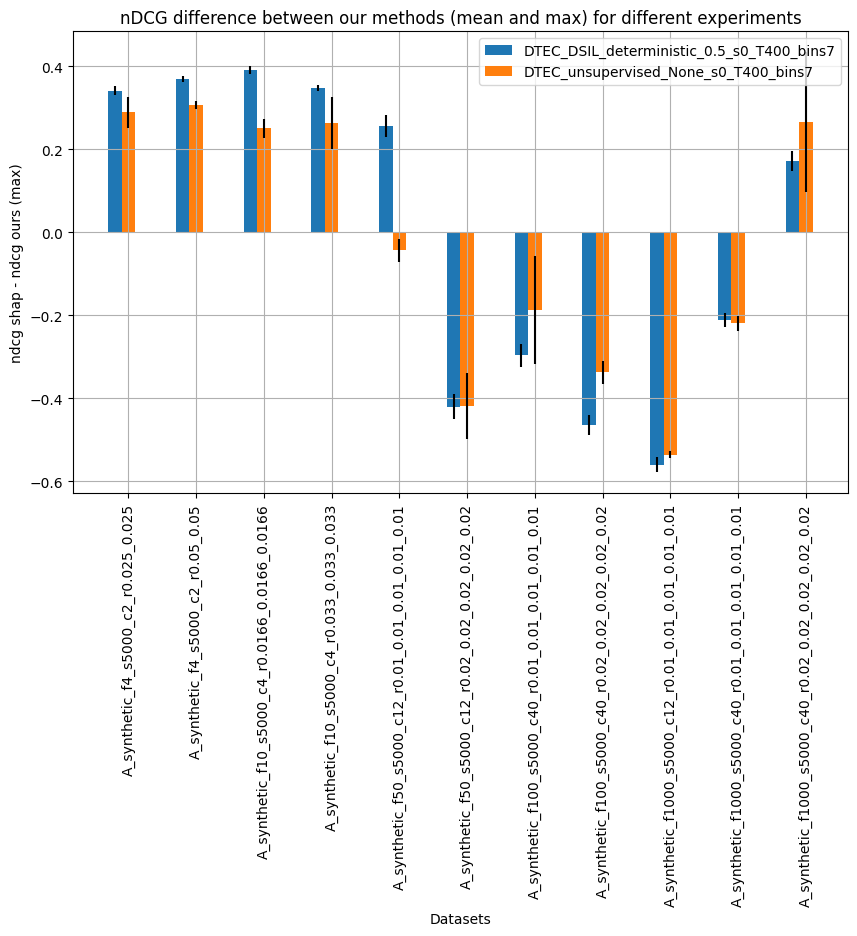

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="ndcg_diff_shap_max", ylabel="ndcg shap - ndcg ours (max)", title="nDCG difference between shap and max(our) for different experiments")

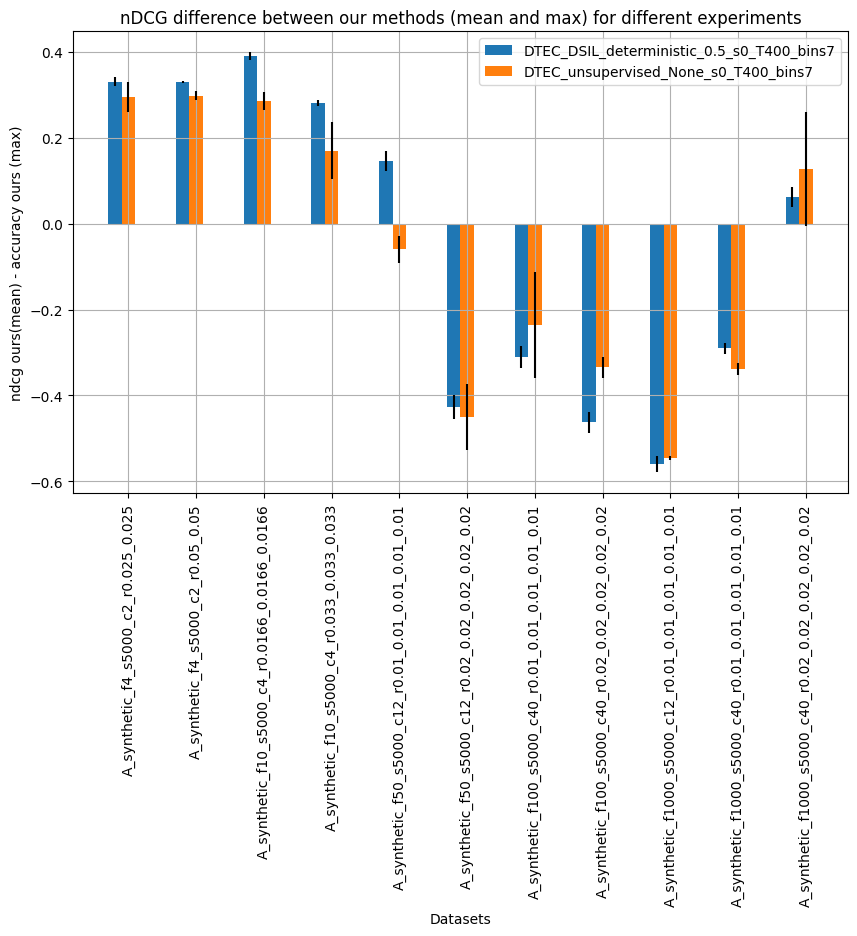

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="ndcg_diff_mean_max", ylabel="ndcg ours(mean) - accuracy ours (max)", title="nDCG difference between our methods (mean and max) for different experiments")

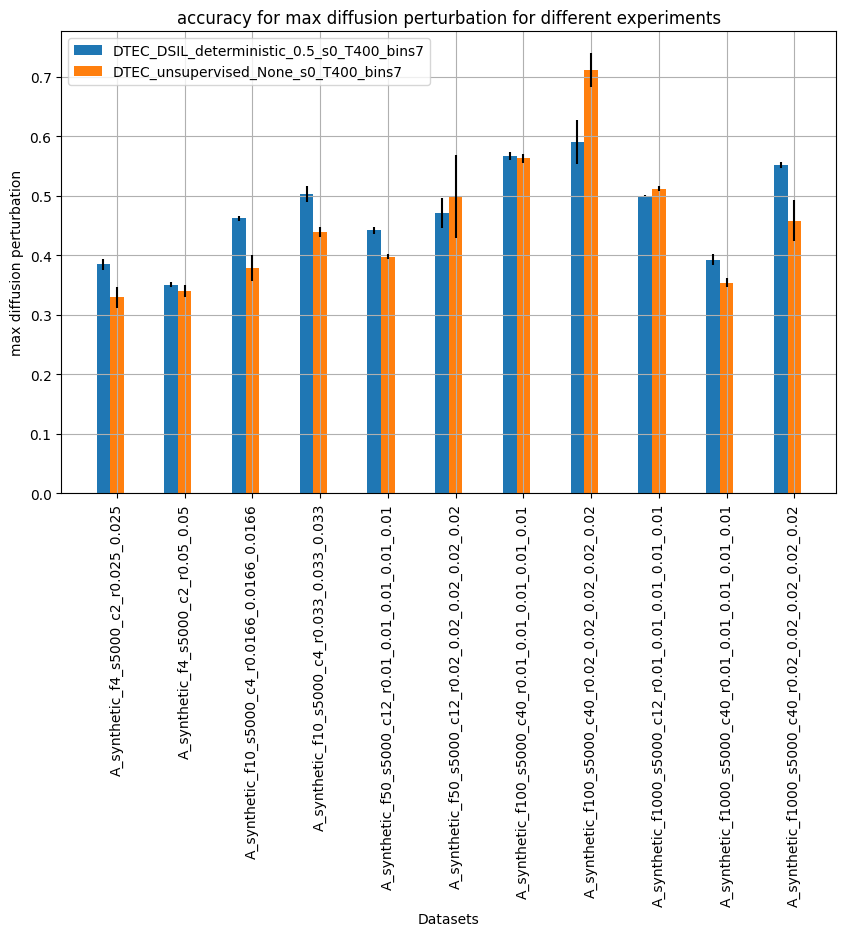

In [ ]:
histogram_experiment(mean_df=mean_df, std_df=std_df, column="max_diffusion_accuracy", ylabel="max diffusion perturbation", title="accuracy for max diffusion perturbation for different experiments")

In [ ]:
# Step 1: Merge DataFrames on common columns
merged_df = pd.merge(mean_df, std_df, on=["dataset_name", "experiment", "dimension", "anomaly_ratio"], suffixes=('_mean', '_std'))
# Step 2: Combine mean and std into a single column with "mean(std)" format
merged_df["f1_score_str"] = merged_df.apply(
    lambda row: f"${row['f1_score_mean']:.2f}({row['f1_score_std']:.2f})$", axis=1
)

# Step 3: Drop the separate mean and std columns if needed
merged_df = merged_df.drop(columns=["f1_score_mean", "f1_score_std"])
print(merged_df.columns)
latex_table = dataframe_to_latex(
    merged_df[['experiment', 'dataset_name', "anomaly_ratio",'f1_score_str']],
    column_format="llc",  
    caption="Mean and Standard Deviation of F1 score for Different Experiments and Datasets",
    label="tab:mean_std",
    index=False
)
with open("latex_table.tex", "w") as f:
    f.write(latex_table)
latex_table.replace("\n", " ")

Index(['experiment', 'dataset_name', 'training_time_mean',
       'inference_time_mean', 'random_seed_mean', 'aucroc_mean',
       'grad_explanation_accuracy_mean', 'grad_explanation_time_mean',
       'grad_ndcg_mean', 'shap_explanation_accuracy_mean',
       'shap_feature_importance_ndcg_mean', 'shap_explanation_time_mean',
       'mean_diffusion_accuracy_mean', 'mean_diffusion_ndcg_mean',
       'mean_diffusion_time_mean', 'max_diffusion_accuracy_mean',
       'max_diffusion_ndcg_mean', 'max_diffusion_time_mean', 'dimension',
       'anomaly_ratio', 'ndcg_diff_shap_mean_mean', 'ndcg_diff_shap_max_mean',
       'ndcg_diff_grad_mean_mean', 'accuracy_diff_shap_mean_mean',
       'accuracy_diff_shap_max_mean', 'accuracy_diff_grad_mean_mean',
       'ndcg_diff_shap_grad_mean', 'accuracy_diff_shap_grad_mean',
       'ndcg_diff_mean_max_mean', 'accuracy_diff_mean_max_mean',
       'training_time_std', 'inference_time_std', 'random_seed_std',
       'aucroc_std', 'grad_explanation_accuracy_

/home/elouan/code/code_repo/notebooks/utils_notebook.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace("_", " "))


'\\begin{table}[ht] \\centering \\caption{Mean and Standard Deviation of F1 score for Different Experiments and Datasets} \\label{tab:mean_std} \\begin{tabular}{llc} \\toprule experiment & dataset name & anomaly ratio & f1 score str \\\\ \\midrule \\bottomrule \\end{tabular} \\end{table}'

In [ ]:
# Define a function to extract and sum all ratios from the dataset name
def extract_ratios(dataset_name):
    # Use re.findall to capture all numerical ratios
    ratios = re.findall(r'r([0-9]*\.?[0-9]+)|_([0-9]*\.?[0-9]+)', dataset_name)
    # Flatten the list of tuples and filter out empty strings
    ratios = [float(r) for pair in ratios for r in pair if r]
    # Return the sum of the ratios
    return f"{sum(ratios) * 100:.2f}"
def rename_row(dataset_name):
    return "synthetic {} - {}".format(re.search(r"f(\d+)", dataset_name).group(1), extract_ratios(dataset_name))
# In dataset name, keep only the word "synthetic" and the number of feature which is after "f_"ArithmeticError
merged_df['dataset_name'] = merged_df['dataset_name'].apply(rename_row)


# Step 4: Pivot the DataFrame to have experiments as columns and datasets as rows
pivot_df = merged_df.pivot(index="dataset_name", columns="experiment", values="f1_score_str")

# If there is NaN in a column, remove the column
pivot_df = pivot_df.replace("nan", np.nan)
pivot_df = pivot_df.dropna(axis=1)
# Same if its nan in a string "nan"
# Step 5: Convert the pivoted DataFrame to LaTeX
latex_table = dataframe_to_latex(
    pivot_df,
    column_format="l" + "c" * (pivot_df.shape[1]),  # Adjust column format dynamically
    caption="F1 Score with Mean and Standard Deviation for Different Experiments and Datasets",
    label="tab:mean_std",
    index=True  # Include the row index (datasets)
)

# Save the LaTeX table to a file
with open("latex_table.tex", "w") as f:
    f.write(latex_table)

# Optional: Print the LaTeX table for verification
print(latex_table.replace("\n", " "))

\begin{table}[ht] \centering \caption{F1 Score with Mean and Standard Deviation for Different Experiments and Datasets} \label{tab:mean_std} \begin{tabular}{l} \toprule dataset_name \\ \midrule \bottomrule \end{tabular} \end{table}


/home/elouan/code/code_repo/notebooks/utils_notebook.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace("_", " "))


In [ ]:
# Turn nDCG and accuracy to string
merged_df["shape_nDCG_str"] = merged_df.apply(
    lambda row: f"${row['shap_feature_importance_ndcg_mean']:.2f}({row['shap_feature_importance_ndcg_std']:.2f})$", axis=1)
merged_df["shape_accuracy_str"] = merged_df.apply(
    lambda row: f"${row['shap_explanation_accuracy_mean']:.2f}({row['shap_explanation_accuracy_std']:.2f})$", axis=1
)
merged_df['local_nDCG_srt'] = merged_df.apply(
    lambda row: f"${row['feature_importance_ndcg_mean']:.2f}({row['feature_importance_ndcg_std']:.2f})$", axis=1
)
merged_df['local_accuracy_str'] = merged_df.apply(
    lambda row: f"${row['feature_importance_accuracy_mean']:.2f}({row['feature_importance_accuracy_std']:.2f})$", axis=1
)
merged_df['grad_nDCG_str'] = merged_df.apply(
    lambda row: f"${row['grad_feature_importance_ndcg_mean']:.2f}({row['grad_feature_importance_ndcg_std']:.2f})$", axis=1
)
merged_df['grad_accuracy_str'] = merged_df.apply(
    lambda row: f"${row['grad_explanation_accuracy_mean']:.2f}({row['grad_explanation_accuracy_std']:.2f})$", axis=1
)

ValueError: Cannot set a DataFrame with multiple columns to the single column local_nDCG_srt

In [ ]:
# Step 4: Pivot the DataFrame to have experiments as columns and datasets as rows
pivot_df = merged_df.pivot(index="dataset_name", columns="experiment", values=["shape_nDCG_str", "shape_accuracy_str", "local_nDCG_srt", "local_accuracy_str", "grad_nDCG_str", "grad_accuracy_str"])

# If there is NaN in a column, remove the column
pivot_df = pivot_df.replace("nan", np.nan)
pivot_df = pivot_df.dropna(axis=1)
pivot_df

dataset_name


In [ ]:
# Same if its nan in a string "nan"
# Step 5: Convert the pivoted DataFrame to LaTeX
latex_table = dataframe_to_latex(
    pivot_df,
    column_format="l" + "c" * (pivot_df.shape[1]),  # Adjust column format dynamically
    caption="F1 Score with Mean and Standard Deviation for Different Experiments and Datasets",
    label="tab:mean_std",
    index=True  # Include the row index (datasets)
)

# Save the LaTeX table to a file
with open("latex_table.tex", "w") as f:
    f.write(latex_table)

# Optional: Print the LaTeX table for verification
print(latex_table.replace("\n", " "))

AttributeError: Can only use .str accessor with Index, not MultiIndex

In [ ]:
merged_df.columns

In [ ]:
dataframe_to_latex(
    merged_df[['experiment', 'dataset_name', 'shap_feature_importance_ndcg_m', 'grad_feature_importance_ndcg', 'feature_importance_ndcg', "shap_explanation_accuracy_mean", "grad_explanation_accuracy_mean", "local_explanation_accuracy_mean"]],
    column_format="llccc",  
    caption="NDCG for Different Experiments and Datasets",
    label="tab:ndcg",
    index=False
)

In [ ]:
baseline_comp_dataset = pd.DataFrame()
temp_df = full_results_df
temp_df['dataset_name'] = temp_df['dataset_name'] + "_" + temp_df['dataset_version']
for dataset_name in full_results_df["dataset_name"].unique():
    dataset_results = full_results_df[full_results_df["dataset_name"] == dataset_name]
    baseline_results = dataset_results[dataset_results["training_method"] == "unsupervised"]
    dataset_results['f1_score_diff'] = dataset_results['f1_score'] - baseline_results['f1_score'].values[0]
    dataset_results['aucroc_diff'] = dataset_results['aucroc'] - baseline_results['aucroc'].values[0]
    dataset_results['aucroc_ratio'] = dataset_results['aucroc'] / baseline_results['aucroc'].values[0]
    dataset_results['f1_score_ratio'] = dataset_results['f1_score'] / baseline_results['f1_score'].values[0]
    dataset_results['feature_importance_ndcg_diff'] = dataset_results['feature_importance_ndcg'] - baseline_results['feature_importance_ndcg'].values[0]
    dataset_results['shap_feature_importance_ndcg_diff'] = dataset_results['shap_feature_importance_ndcg'] - baseline_results['shap_feature_importance_ndcg'].values[0]
    baseline_comp_dataset = pd.concat([baseline_comp_dataset, dataset_results]) 